## Importing Necessary Libraries

In [3]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install country_converter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import country_converter as coco

import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from PIL import Image
import requests

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [8]:
books = pd.read_csv("../data/Books.csv")
ratings = pd.read_csv("../data/Ratings.csv")
users = pd.read_csv("../data/Users.csv")

In [9]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Display the shape of the dataframes

In [12]:
def shape_of_dataset(df, dataset_name="df"):
    
    print(f"{dataset_name} dataset has {df.shape[0]} nrows and {df.shape[1]} ncolumns")
    return df.shape[0], df.shape[1]

In [7]:
books_r, books_c = shape_of_dataset(books, "Books")
ratings_r, ratings_c = shape_of_dataset(ratings, "Ratings")
users_r, users_c = shape_of_dataset(users, "Users")

Books dataset has 271360 nrows and 8 ncolumns
Ratings dataset has 1149780 nrows and 3 ncolumns
Users dataset has 278858 nrows and 3 ncolumns


## Display the total number of null values in dataframes

In [8]:
def count_null_values(df, dataset_name):
    
    num_of_total_null_values = sum(df.isnull().sum().values)
    print(f"{dataset_name} dataset has {num_of_total_null_values} null values")
    return num_of_total_null_values

In [9]:
books_null = count_null_values(books, "Books")
ratings_null = count_null_values(ratings, "Ratings")
users_null = count_null_values(users, "Users")

Books dataset has 6 null values
Ratings dataset has 0 null values
Users dataset has 110762 null values


## Detect the null cols in the dataframes

In [10]:
def detect_null_columns(df, dataset_name):
    
    col = []
    s = df.isnull().sum()
    for x in range(len(s)):
        if s[x] > 0:
            col.append(s.index[x])
    tot_cols = len(col)
    if tot_cols == 0:
        print(f"{dataset_name} dataset has no null columns")
        print("="*50)
    else:
        print(f"{dataset_name} dataset has {tot_cols} null columns and they are:")
        for x in col:
            print(x, end=',')
        print()
        print("="*50)
    return col, len(col)

In [11]:
total_books_null_cols, books_null_cols = detect_null_columns(books, "Books")
total_ratings_null_cols, ratings_null_cols = detect_null_columns(ratings, "Ratings")
total_users_null_cols, users_null_cols = detect_null_columns(users, "Users")

Books dataset has 3 null columns and they are:
Book-Author,Publisher,Image-URL-L,
Ratings dataset has no null columns
Users dataset has 1 null columns and they are:
Age,


## create the comparison dataframe

In [12]:
detailed_db = pd.DataFrame({
    'dataset' : [],
    'nrows' : [],
    'ncols' :[],
    'null_amount' : [],
    'names_of_null_cols' : [],
    'num_null_cols' : []
})

In [13]:
def fill_db_dataset(dataset_name, nrows, ncols, null_amount, name_null_cols, num_null_cols):
    detailed_db.loc[len(detailed_db.index)] = [dataset_name, nrows, ncols, null_amount, ', '.join(name_null_cols), int(num_null_cols)]

In [14]:
fill_db_dataset('Books', books_r, books_c, books_null, total_books_null_cols, books_null_cols)
fill_db_dataset('Ratings', ratings_r, ratings_c, ratings_null, total_ratings_null_cols, ratings_null_cols)
fill_db_dataset('Users', users_r, users_c, users_null, total_users_null_cols, users_null_cols)

In [15]:
detailed_db

,dataset,nrows,ncols,null_amount,names_of_null_cols,num_null_cols
0,Books,271360.0,8.0,6.0,"Book-Author, Publisher, Image-URL-L",3.0
1,Ratings,1149780.0,3.0,0.0,,0.0
2,Users,278858.0,3.0,110762.0,Age,1.0


## Display infos about dataframes

In [16]:
def print_info_about_ds(df, name_of_the_ds = "df"):
    print(f"Info about the {name_of_the_ds} dataset: ")
    dash_sep()
    print(df.info())
    
def dash_sep(num=50):
    print("_"*num)

def double_fs_sep(num=40):
    print("//"*num)

In [17]:
print_info_about_ds(books, "Books")
double_fs_sep()

print_info_about_ds(ratings, "Ratings")
double_fs_sep()

print_info_about_ds(users, "Users")

Info about the Books dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
////////////////////////////////////////////////////////////////////////////////
Info about the Ratings dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (tot

## Display number of unique values in each column in the dataframes

In [18]:
def print_nunique_vals(df, ds_name = 'df'):
    print(f"number of unique values in each column in the {ds_name} dataset:")
    dash_sep(75)
    print(df.nunique())

In [19]:
print_nunique_vals(books, 'Books')
double_fs_sep()

print_nunique_vals(ratings, 'Ratings')
double_fs_sep()

print_nunique_vals(users, 'Users')

number of unique values in each column in the Books dataset:
___________________________________________________________________________
ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
////////////////////////////////////////////////////////////////////////////////
number of unique values in each column in the Ratings dataset:
___________________________________________________________________________
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64
////////////////////////////////////////////////////////////////////////////////
number of unique values in each column in the Users dataset:
___________________________________________________________________________
User-ID     278858
Location     57339
Age            165
dtype: int64


## Plot the distrbution of Missing values in the dataframes

In [20]:
def plot_miss_vals(df, ds_name):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

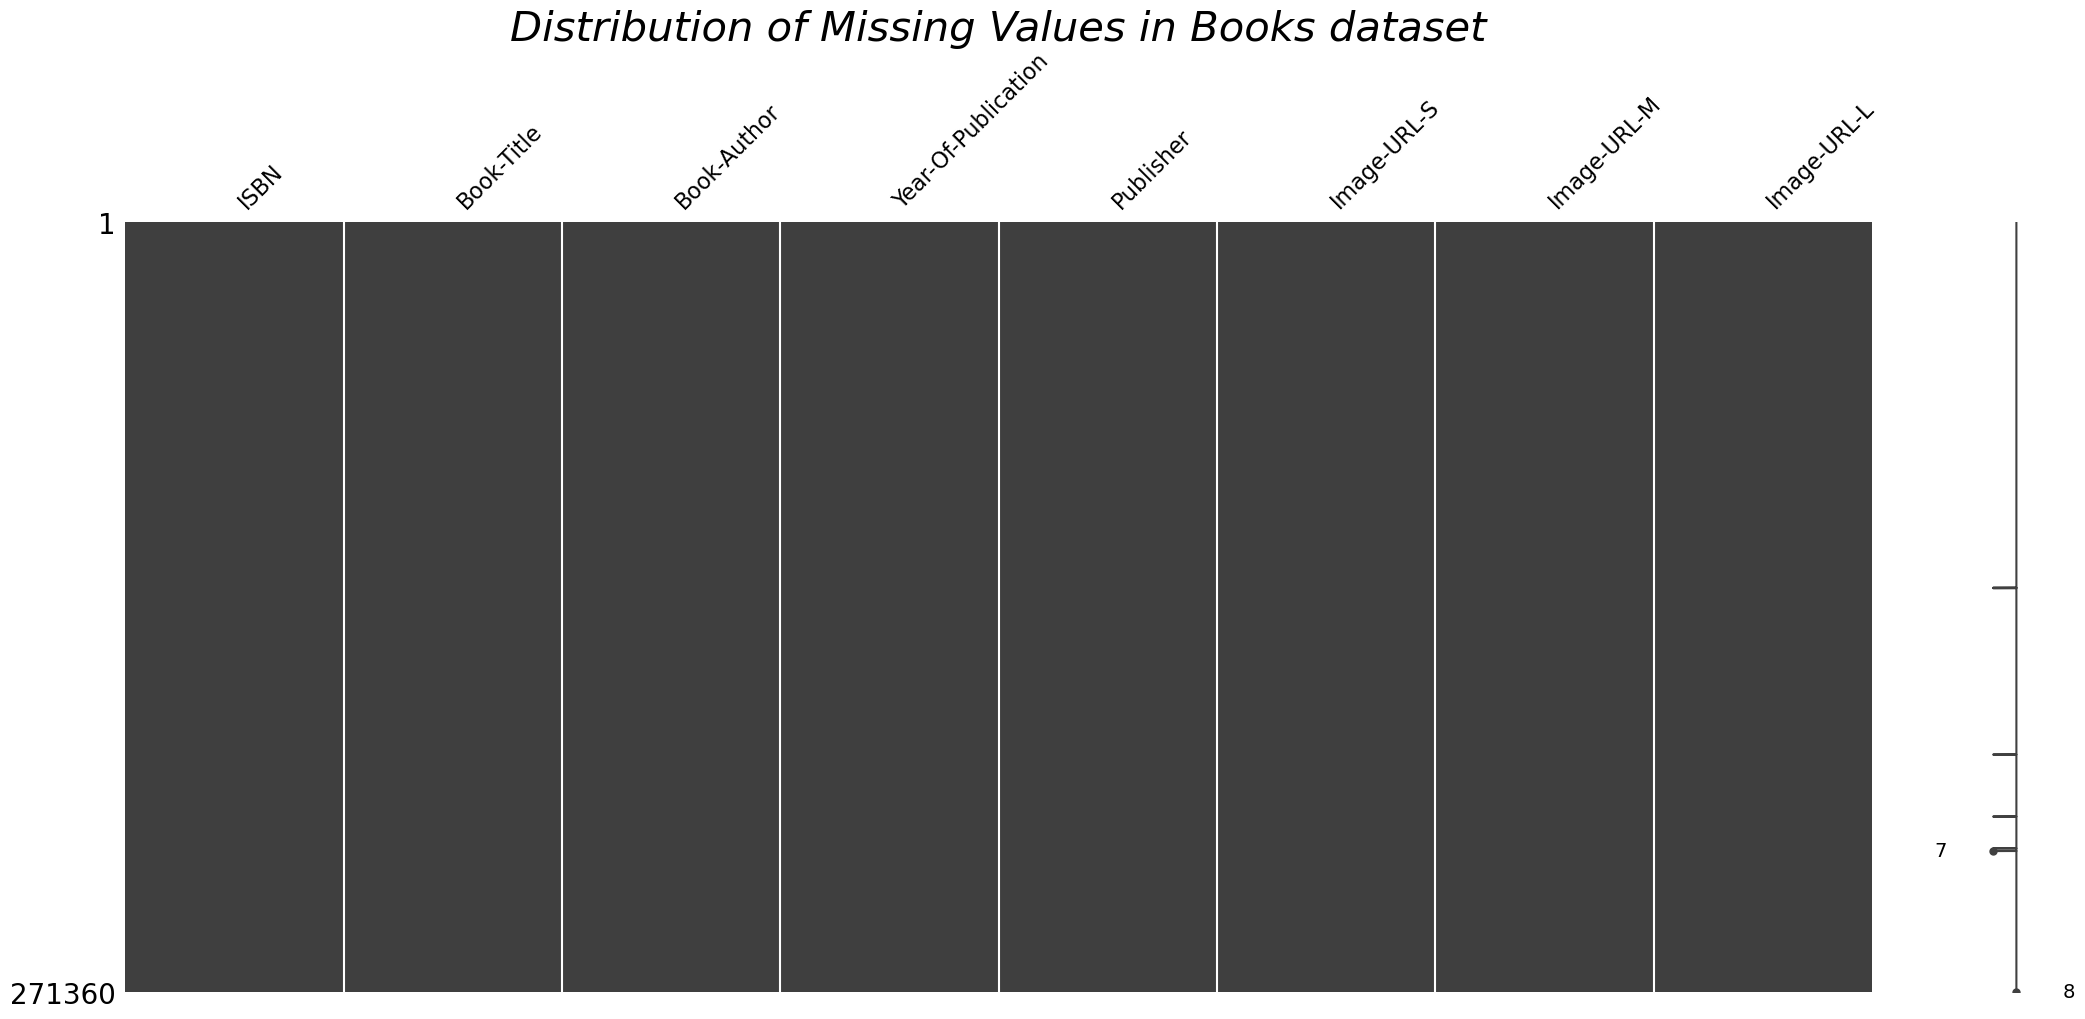

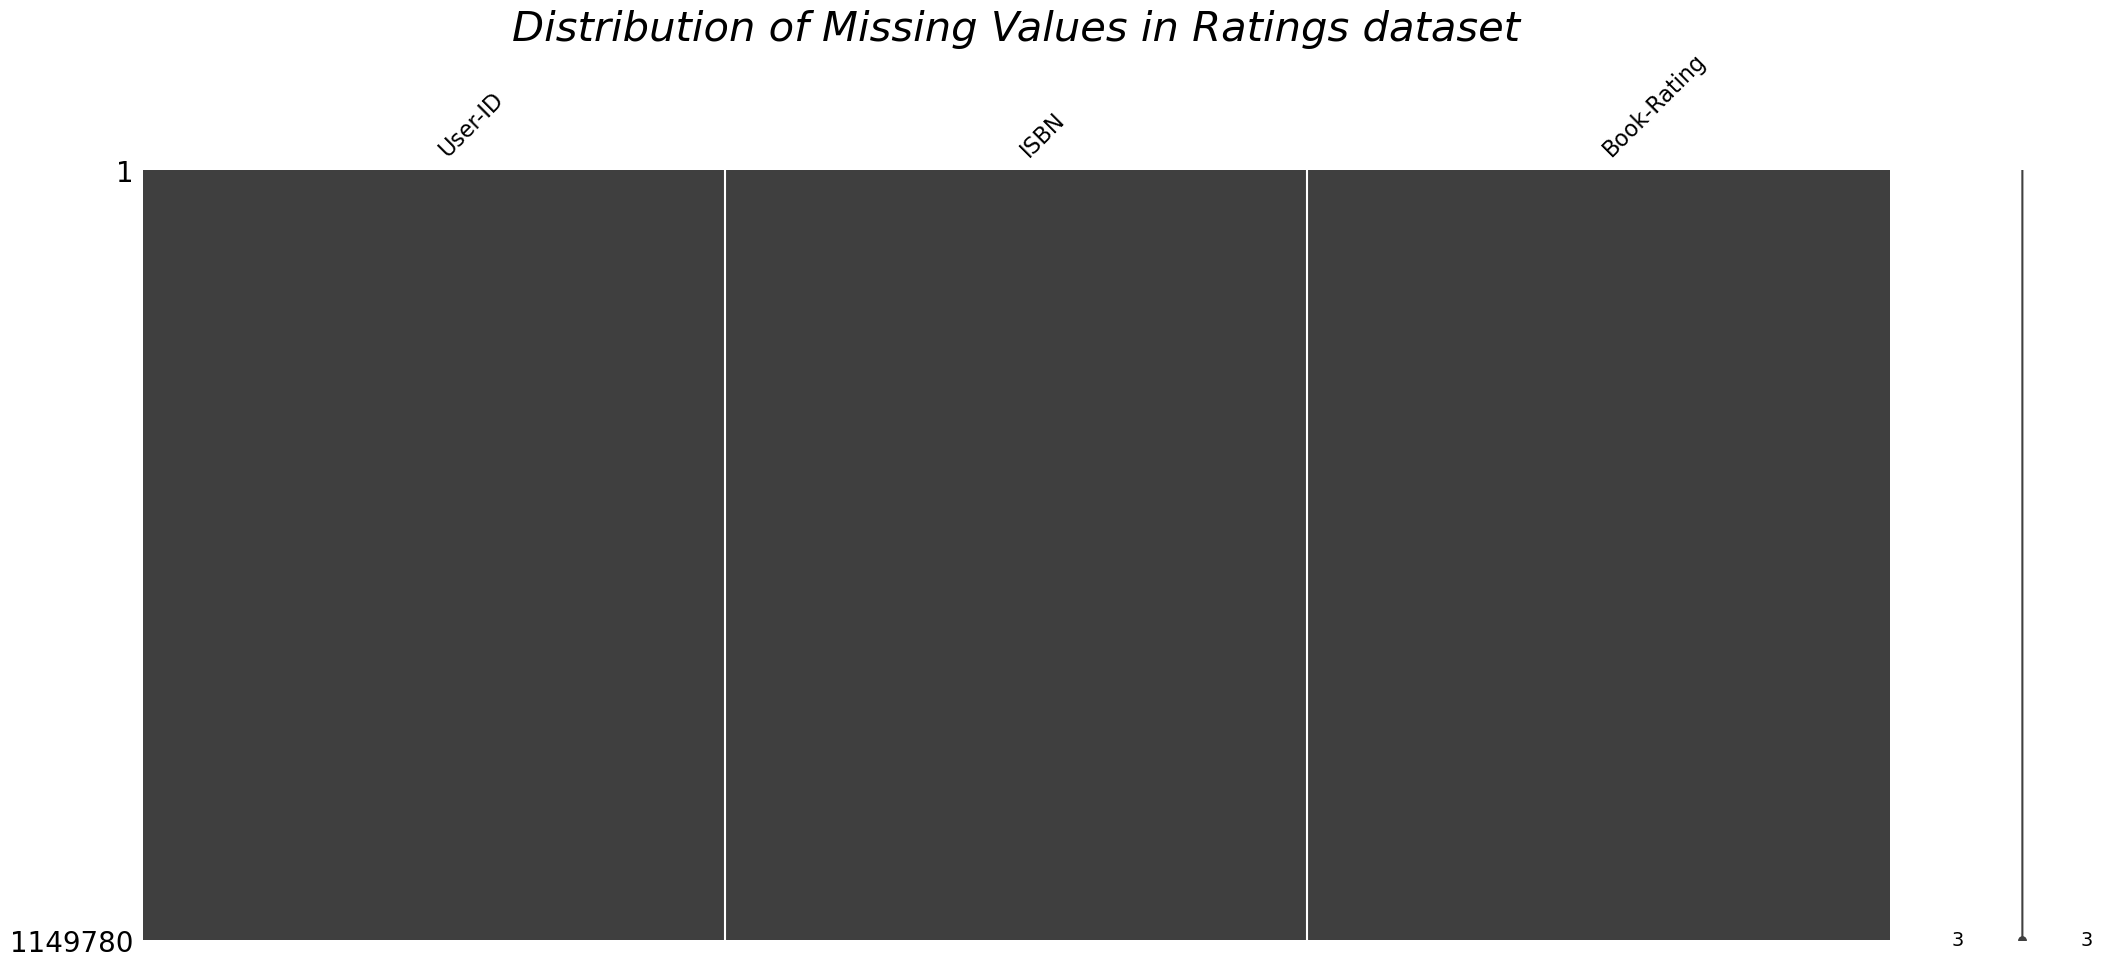

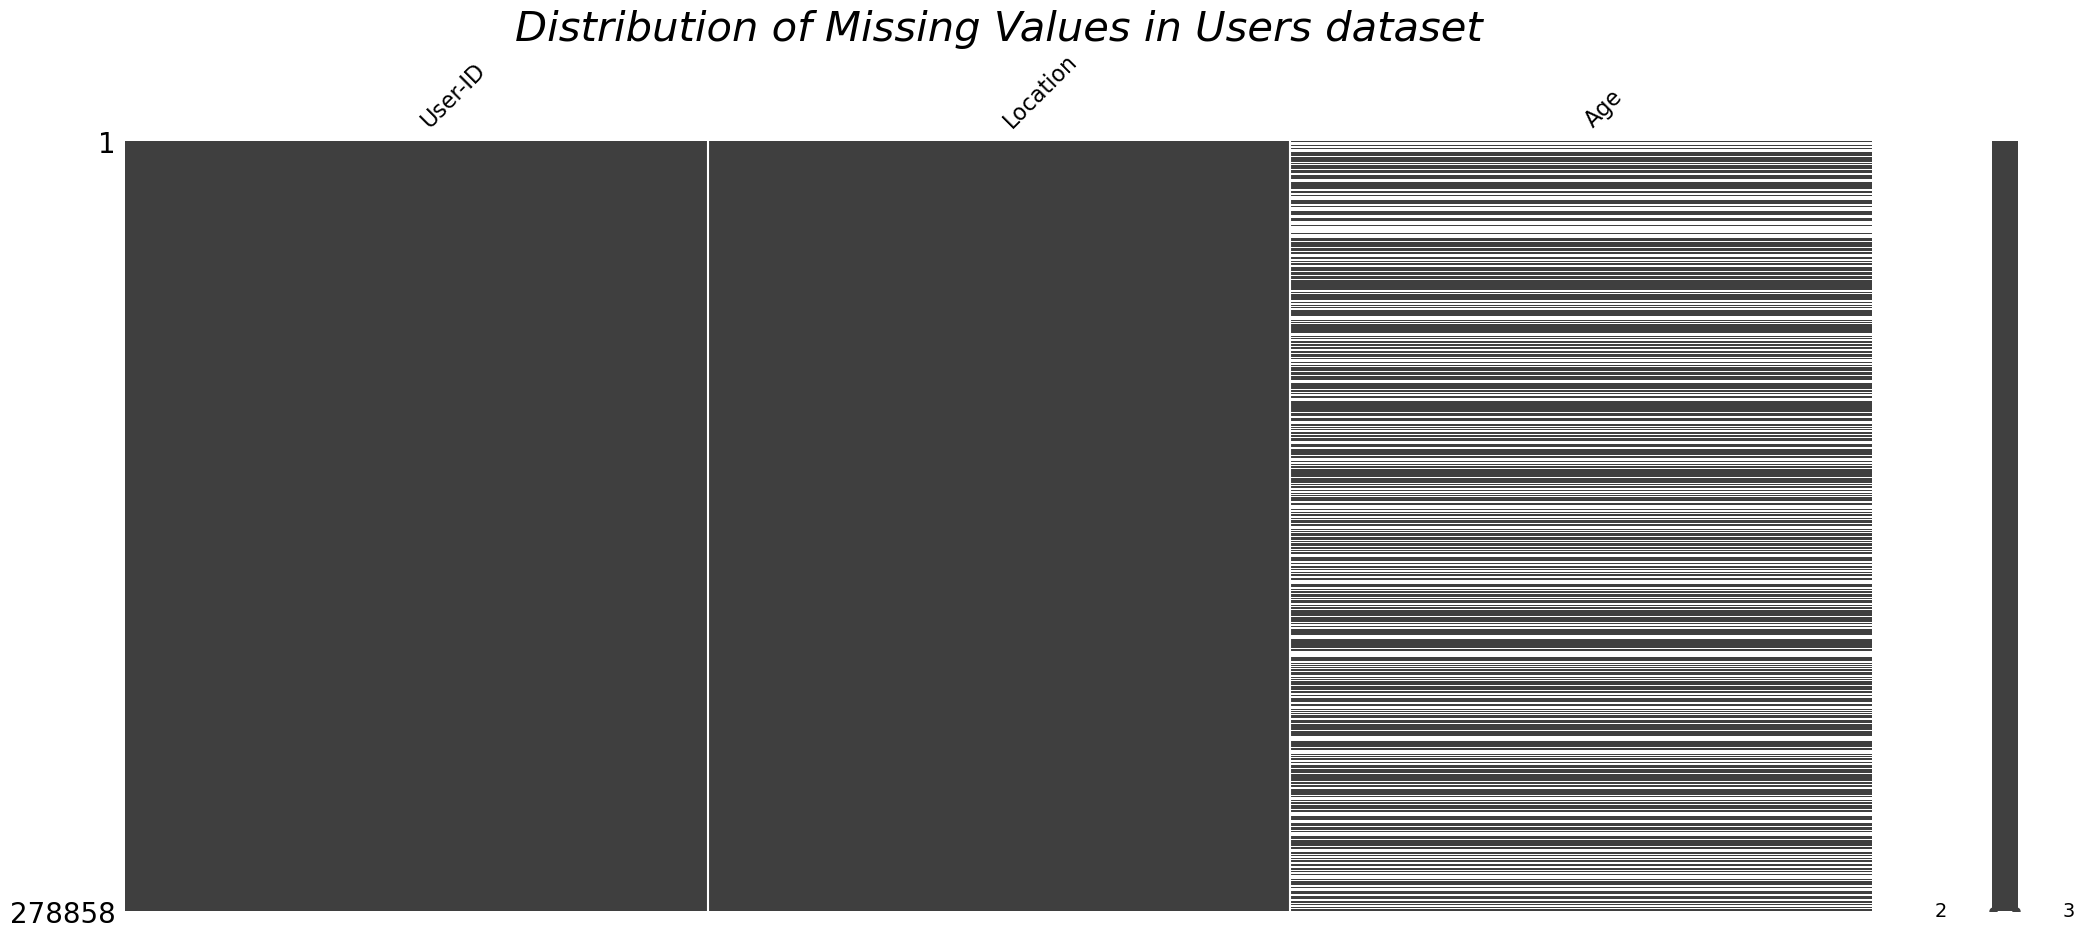

In [21]:
plot_miss_vals(books, "Books")
plot_miss_vals(ratings, "Ratings")
plot_miss_vals(users, "Users")

## Display the data types of the dataframes

In [22]:
def print_dtype_of_df(df, ds_name = 'df'):
    print(f"data type of each column in the {ds_name} dataset:")
    dash_sep(75)
    print(df.dtypes)

In [23]:
print_dtype_of_df(books, 'Books')
double_fs_sep()

print_dtype_of_df(ratings, 'Ratings')
double_fs_sep()

print_dtype_of_df(users, 'Users')

data type of each column in the Books dataset:
___________________________________________________________________________
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
////////////////////////////////////////////////////////////////////////////////
data type of each column in the Ratings dataset:
___________________________________________________________________________
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object
////////////////////////////////////////////////////////////////////////////////
data type of each column in the Users dataset:
___________________________________________________________________________
User-ID       int64
Location     object
Age         float64
dtype: object


## EDA + Vis + Preprocessing

In [24]:
def plot_top20(df, column, title, x_label, y_label, top=20, template = 'plotly_dark'):
    
    pl = df[column].value_counts().head(top)
    fig = px.bar(y=pl.values, 
                 x=pl.index, 
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 text=pl.values,
                 title= title,
                 template= template)
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        font = dict(size=15,family="Franklin Gothic"))
    fig.show()

**we will see top years in which books were published**

**There is an erorr in the Year Of Publication column when converting its data type to int take a look**

In [25]:
books['Year-Of-Publication'].astype('int32')

ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'

**in The year of publication column there is an error in which the column contain string value 'DK Publishing Inc' and thats a data entry error, a year column all its value should be integers but lets fix it**

In [26]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


**here we can see in this 2 rows the value of the year is value in the Book author, and the value of Year of Publication should be in the publisher, so from this pattern we can conclude that the values needs to be shifted**

In [27]:
temp = books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

In [28]:
temp[temp['Book-Author'] == temp['Book-Author'][209538]]['Book-Title'].values[0]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

In [29]:
temp[temp['Book-Author'] == temp['Book-Author'][209538]]['Book-Title'].values[1]

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

**As we can see here in the previous outputs that the name of the authors are concatenated with the Book title so we need to seperate them**

In [30]:
authors = []
books_titles = []

for title in temp['Book-Title']:
    
    author = title.split(';')[-1].split('"')[0]
    book = title.split(';')[0].split('\\')[0]

    authors.append(author)
    books_titles.append(book)

In [31]:
authors

['Michael Teitelbaum', 'Jean-Marie Gustave Le ClÃ?Â©zio', 'James Buckley']

In [32]:
books_titles

['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)',
 "Peuple du ciel, suivi de 'Les Bergers",
 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)']

**now we have separated the book titles and the authors lets shift the values and assign the new ones**

In [33]:
cols_to_shift = books.columns[1:]
cols_to_shift

Index(['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [34]:
temp = pd.concat([temp['ISBN'].to_frame(), temp[cols_to_shift].shift(periods = 1, axis = 1)], axis=1)
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,NaN,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,NaN,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,NaN,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


**Now we have shifted the value lets assign the new ones**

In [35]:
temp['Book-Title'] = books_titles
temp['Book-Author'] = authors

In [36]:
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


**Perfet! now lets assign the new rows to the original books data**

In [37]:
rows_to_rem = list(temp.index)
rows_to_rem

[209538, 220731, 221678]

In [38]:
books.shape

(271360, 8)

In [39]:
books.drop(rows_to_rem, axis=0, inplace=True)

In [40]:
books.shape

(271357, 8)

**now we removed the dirty rows, let's add the new cleaned ones**

In [41]:
for ind in rows_to_rem:
    
    books.loc[ind] = list(temp.loc[ind].values)

In [42]:
books.shape

(271360, 8)

In [43]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')

In [44]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

**Perfect! now the year column had been fixed :)**

In [45]:
plot_top20(books, 'Year-Of-Publication', 'Top 20 years in which books were published in terms of count', "Year", "Count")

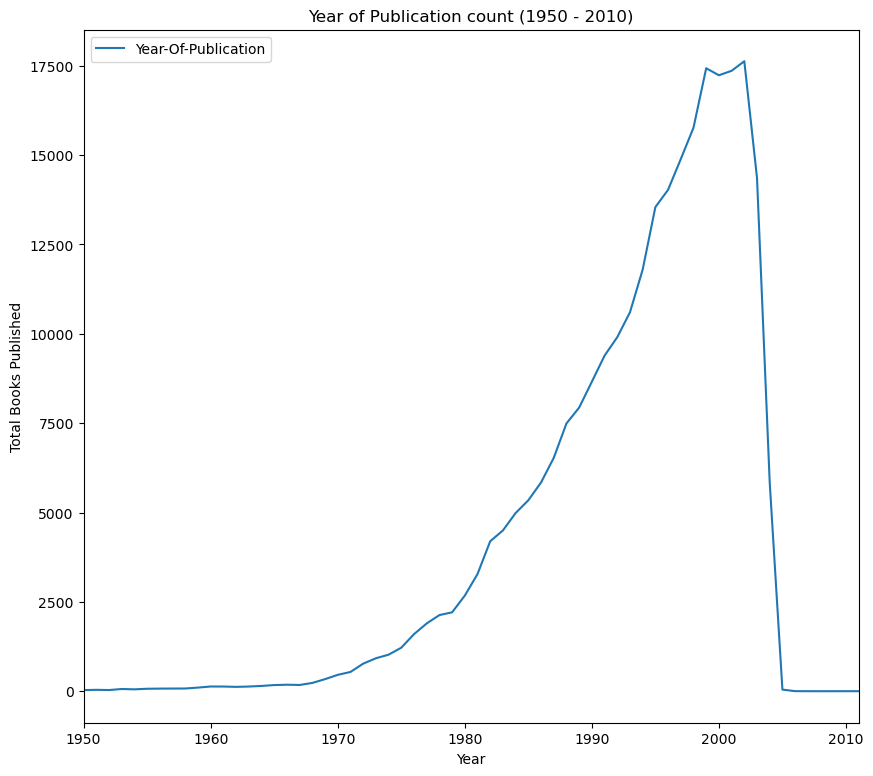

In [46]:
year_count=books['Year-Of-Publication'].value_counts()
year_count=pd.DataFrame(year_count)

plt.figure(figsize=(10, 9))
sns.lineplot(data=year_count)
plt.title('Year of Publication count (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()

**The years 99 to 02 are the years in which most books were published**

**We will now see the top 20 authors with books in this data**

In [47]:
plot_top20(books, 'Book-Author', "Top 20 Authors authored books by count", "Author name", "Count")

**Agatha Christie is the top author with 632 books in the dataset**

**We will see the top 20 Publishers who have publisbed books in this data**

In [48]:
plot_top20(books, 'Publisher', "Top 20 Publishers who have published books", "Publisher name", "Count")

**Now lets see the distrbution of the users by the country**

**Let's extract the country from location column in the users dataset**

In [49]:
countries = []
cond = users['Location'].str.split(',')

for cont in cond:
    
    countries.append(cont[-1])

**Now we have extracted the countries, let's assign the countries to the dataset**

In [50]:
users['Country'] = countries
users.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [51]:
converted_country=coco.convert(names=users["Country"], to="ISO3")
users["Country"]=converted_country

In [52]:
country=users["Country"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of users by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

**Merge books df with ratings**

In [53]:
books_with_ratings = pd.merge(books, ratings, on='ISBN')

In [54]:
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [55]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=10),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [56]:
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [57]:
cat_summary_with_graph(books_with_ratings, 'Book-Rating')

**Now let's see the average rating of the books of the top 20 authors**

**First we are returning the top 20 authors in the data**

In [58]:
authors_top20 = books['Book-Author'].value_counts().head(20)
authors_top20 = list(authors_top20.index)

**then we are droping the null values (there are only 3 null values in the data so it is safely to drop them and this step is a must for pandas filtering in next cell)**

In [59]:
books_with_ratings.dropna(inplace=True)

In [60]:
top20_authors = pd.DataFrame(columns = books_with_ratings.columns)

for author in authors_top20:
    
    cond_df = books_with_ratings[books_with_ratings['Book-Author'] == author]
    
    top20_authors =  pd.concat([top20_authors, cond_df], axis=0)
    
    

**we have returned the top 20 authors succssefully!!**<br>
**so the top20_authors df contains only 20 authors**

In [61]:
top20_authors.shape

(45234, 10)

**There is no 0 rating, ratings is from 1-10 scale, then 0 means the book is not rated that it is not rated**<br>
**so we are excluding the zero rating from our data**

In [62]:
top20_author = top20_authors[top20_authors['Book-Rating'] != 0]

In [63]:
top20_author.shape

(16871, 10)

**all set! lets now return the mean rating of all the 20 authors**

In [64]:
top20_author = top20_author.groupby('Book-Author')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)
top20_author

,Book-Author,Book-Rating
19,William Shakespeare,8.303357
11,Mark Twain,8.284507
8,Jane Austen,8.187595
18,Terry Pratchett,8.151177
14,Not Applicable (Na ),8.094340
7,Isaac Asimov,7.915167
3,Carolyn Keene,7.823529
17,Stephen King,7.815046
0,Agatha Christie,7.792102
4,Charles Dickens,7.762836


**now lets visualize it!**

In [65]:
fig = px.bar(y=top20_author['Book-Rating'], 
             x=top20_author['Book-Author'], 
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=round(top20_author['Book-Rating'],2),
             title= "Average ratings of the books of the Top 20 authors",
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="author name",
    yaxis_title="average rating",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

**William Shakespeare is the top rated author!!**

**Now let's see the average rating of the books of the top 20 publishersو so we are going to repeat the same steps**

In [66]:
publishers_top20 = books['Publisher'].value_counts().head(20)
publishers_top20 = list(publishers_top20.index)

top20_publishers = pd.DataFrame(columns = books_with_ratings.columns)

for pub in publishers_top20:
    
    cond_df = books_with_ratings[books_with_ratings['Publisher'] == pub]
    
    top20_publishers =  pd.concat([top20_publishers, cond_df], axis=0)
    
    
top20_publishers = top20_publishers[top20_publishers['Book-Rating'] != 0]
top20_publishers = top20_publishers.groupby('Publisher')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top20_publishers

,Publisher,Book-Rating
11,Scholastic,7.818161
7,Penguin Books,7.773789
17,Tor Books,7.686075
0,Ballantine Books,7.610437
16,St. Martin's Press,7.596059
12,Signet Book,7.591292
5,HarperCollins Publishers,7.584115
9,Pocket,7.564115
18,Warner Books,7.543623
14,Simon &amp; Schuster,7.522894


In [67]:
fig = px.bar(y=top20_publishers['Book-Rating'], 
             x=top20_publishers['Publisher'], 
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=round(top20_publishers['Book-Rating'],2),
             title= "Average ratings of the books of the Top 20 Publishers",
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Publisher name",
    yaxis_title="average rating",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

**The average rating of the books of the publishers are close to each other!**

**Now we are going to see the Most rated books by users**

In [68]:
df = pd.merge(books_with_ratings, users, on='User-ID')
df = books_with_ratings[books_with_ratings['Book-Rating'] != 0]
plot_top20(df, 'Book-Title', "Most Rated Books by Users", "Book Title", "Number of ratings")

**Now let's see the top rated books**

In [69]:
books_top20 = df['Book-Title'].value_counts().head(20)
books_top20 = list(books_top20.index)

top20_books = pd.DataFrame(columns = books_with_ratings.columns)

for book in books_top20:
    
    cond_df = books_with_ratings[books_with_ratings['Book-Title'] == book]
    
    top20_books =  pd.concat([top20_books, cond_df], axis=0)
    
    
top20_books = top20_books[top20_books['Book-Rating'] != 0]
top20_books = top20_books.groupby('Book-Title')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top10_books = top20_books.head(10)
top10_books

,Book-Title,Book-Rating
6,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321
7,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508
5,Harry Potter and the Chamber of Secrets (Book 2),8.840491
16,The Secret Life of Bees,8.477833
10,The Da Vinci Code,8.439271
11,The Lovely Bones: A Novel,8.185290
15,The Red Tent (Bestselling Backlist),8.182768
18,Where the Heart Is (Oprah's Book Club (Paperba...,8.142373
8,Life of Pi,8.080357
1,Angels &amp; Demons,8.016129


In [70]:
fig = px.bar(y=top10_books['Book-Rating'], 
             x=top10_books['Book-Title'], 
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=round(top10_books['Book-Rating'],2),
             title= "Top 10 rated books by the users",
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Book title",
    yaxis_title="average rating",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

**Harry Potter are the most rated books!**

**Now we can recommend the most popular books!!**

## Most Popular Books recommendation

In [71]:
def prGreen(skk): print("\033[92m {}\033[00m" .format(skk))
def prRed(skk): print("\033[91m {}\033[00m" .format(skk))
def prYellow(skk): print("\033[93m {}\033[00m" .format(skk))

    
def popular_books():
    
    for (book, ratings) in zip(top10_books['Book-Title'], top10_books['Book-Rating']):
        prGreen(book)
        print("Rating",end='->')
        prRed(round(ratings,1))
        print("-"*50)
        
popular_books()

 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; Demons
Rating-> 8.0
--------------------------------------------------


## Item Based Collaborative Filtering

**We are going to count the rating books to classify the common and rare ones**

In [72]:
count_rate = pd.DataFrame(df['Book-Title'].value_counts())
count_rate.head()

,Book-Title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393


**So we are going to classify the rare books as the books who got rated 100 or less times**

In [73]:
rare_books=count_rate[count_rate["Book-Title"]<=100].index
rare_books[:5]

Index(['Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)',
       'Daddy's Little Girl', 'Disclosure',
       'The Queen of the Damned (Vampire Chronicles (Paperback))',
       'Cause of Death'],
      dtype='object')

In [74]:
len(rare_books)

135373

**so if the book is not included in the rare books we are going to classify it as common one**

In [75]:
common_books=df[~df["Book-Title"].isin(rare_books)]
common_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
36,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,49635,9
37,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,67958,10


In [76]:
common_books.shape

(33641, 10)

**Now lets make recommendation if the book is common**

**First lets create dataframe which its index is the Users IDs and the columns are the books titles and the values are the rating of the user to that book**

In [77]:
item_based_cb = common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")

**Lets now assume a book title and see what recommendation we can make**

The corrwith function in Pandas computes pair-wise correlations between rows and columns of a dataframe with rows and columns of a series or dataframe. Rows and columns of the dataframe and the other object are first matched before computing the correlations.

**Now we are creating recommendation df with the corrwith function**

In [78]:
book_title = 'Me Talk Pretty One Day'
sim = item_based_cb[book_title]
recommendation_df=pd.DataFrame(item_based_cb.corrwith(sim).sort_values(ascending=False)).reset_index(drop=False)
recommendation_df

,Book-Title,0
0,Me Talk Pretty One Day,1.0
1,Left Behind: A Novel of the Earth's Last Days ...,1.0
2,"A Child Called \It\"": One Child's Courage to S...",1.0
3,Lord of the Flies,1.0
4,The Chamber,1.0
...,...,...
187,The Rescue,NaN
188,"The Return of the King (The Lord of the Rings,...",NaN
189,The Smoke Jumper,NaN
190,When the Wind Blows,NaN


**Lets check if the book the user choosen is included in the recommendation df or not, bec if it is included we don't want to recommend it so we will make sure to drop it**

In [79]:
if not recommendation_df['Book-Title'][recommendation_df['Book-Title'] == book_title].empty:
    recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==book_title].index[0])

**Lets now collect the books with less ratings (which its average rating is less than 5)**

In [80]:
less_rating=[]
for i in recommendation_df["Book-Title"]:
    if df[df["Book-Title"]==i]["Book-Rating"].mean() < 5:
        less_rating.append(i)
        
less_rating

['Wild Animus']

**Lets make sure to rank the highly rated books**

In [81]:
if recommendation_df.shape[0] - len(less_rating) > 5:
    
    recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]            
    recommendation_df.columns=["Book-Title","Correlation"]
    
    
for (candidate_book, corr) in zip(recommendation_df['Book-Title'], recommendation_df['Correlation']):
    corr_thershold = 0.7
    if corr > corr_thershold:
        ratings = df[df['Book-Title'] == candidate_book]['Book-Rating'].mean()
        prGreen(candidate_book)
        print("Rating ", end = '->')
        prRed(round(ratings,1))
        print("-"*50)
    else:
        break

 Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)
Rating -> 7.7
--------------------------------------------------
 A Child Called \It\": One Child's Courage to Survive"
Rating -> 8.0
--------------------------------------------------
 Lord of the Flies
Rating -> 8.0
--------------------------------------------------
 The Chamber
Rating -> 7.4
--------------------------------------------------
 The Poisonwood Bible: A Novel
Rating -> 8.2
--------------------------------------------------
 The Lost World
Rating -> 7.2
--------------------------------------------------
 Four Blind Mice
Rating -> 8.2
--------------------------------------------------
 It
Rating -> 8.1
--------------------------------------------------
 She's Come Undone (Oprah's Book Club)
Rating -> 7.7
--------------------------------------------------
 While I Was Gone
Rating -> 7.0
--------------------------------------------------
 The Reader
Rating -> 7.2
---------------------------------------------

**Hooray!! We created the recommendation system :)**<br>
**Now our item based collaborative recommendation system is ready, lets put it all together to bulild our RS**

In [82]:
def item_based_coll_rs(book_title):
    
    book_title = str(book_title)
    if book_title in books_with_ratings['Book-Title'].values:
        
        count_rate = pd.DataFrame(df['Book-Title'].value_counts())
        rare_books=count_rate[count_rate["Book-Title"]<=100].index
        
        common_books=df[~df["Book-Title"].isin(rare_books)]

        if book_title in rare_books:
            prYellow("A rare book, so u may try our popular books: \n ")
            popular_books()
            
        else:
            
            item_based_cb = common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            sim = item_based_cb[book_title]
            recommendation_df=pd.DataFrame(item_based_cb.corrwith(sim).sort_values(ascending=False)).reset_index(drop=False)

            if not recommendation_df['Book-Title'][recommendation_df['Book-Title'] == book_title].empty:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==book_title].index[0])

            less_rating=[]
            for i in recommendation_df["Book-Title"]:
                if df[df["Book-Title"]==i]["Book-Rating"].mean() < 5:
                    less_rating.append(i)

            if recommendation_df.shape[0] - len(less_rating) > 5:

                recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]            
                recommendation_df.columns=["Book-Title","Correlation"]


            for (candidate_book, corr) in zip(recommendation_df['Book-Title'], recommendation_df['Correlation']):
                corr_thershold = 0.7
                if corr > corr_thershold:
                    ratings = df[df['Book-Title'] == candidate_book]['Book-Rating'].mean()
                    prGreen(candidate_book)
                    print("Rating ", end = '->')
                    prRed(round(ratings,1))
                    print("-"*50)
                else:
                    break
                
    else:
        prYellow("This book is not in our library, check out our most popular books:")
        print()
        popular_books()

In [83]:
item_based_coll_rs('Me Talk Pretty One Day')

 Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)
Rating -> 7.7
--------------------------------------------------
 A Child Called \It\": One Child's Courage to Survive"
Rating -> 8.0
--------------------------------------------------
 Lord of the Flies
Rating -> 8.0
--------------------------------------------------
 The Chamber
Rating -> 7.4
--------------------------------------------------
 The Poisonwood Bible: A Novel
Rating -> 8.2
--------------------------------------------------
 The Lost World
Rating -> 7.2
--------------------------------------------------
 Four Blind Mice
Rating -> 8.2
--------------------------------------------------
 It
Rating -> 8.1
--------------------------------------------------
 She's Come Undone (Oprah's Book Club)
Rating -> 7.7
--------------------------------------------------
 While I Was Gone
Rating -> 7.0
--------------------------------------------------
 The Reader
Rating -> 7.2
---------------------------------------------

In [84]:
item_based_coll_rs("From One to One Hundred")

 A rare book, so u may try our popular books: 
 
 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; Demons
Rating-> 8.0
--

In [85]:
item_based_coll_rs("Harry Potter and the Prisoner of Azkaban (Book 3)")

 The Beach House
Rating -> 7.7
--------------------------------------------------
 Unnatural Exposure
Rating -> 7.8
--------------------------------------------------
 The Blind Assassin
Rating -> 7.5
--------------------------------------------------
 Back Roads
Rating -> 7.3
--------------------------------------------------
 Mystic River
Rating -> 7.9
--------------------------------------------------
 The Color of Water: A Black Man's Tribute to His White Mother
Rating -> 8.3
--------------------------------------------------
 Angela's Ashes (MMP) : A Memoir
Rating -> 8.0
--------------------------------------------------
 The Smoke Jumper
Rating -> 7.4
--------------------------------------------------
 Isle of Dogs
Rating -> 5.4
--------------------------------------------------
 Pigs in Heaven
Rating -> 8.0
--------------------------------------------------
 Tell No One
Rating -> 8.1
--------------------------------------------------
 Pet Sematary
Rating -> 7.9
-----------------

In [86]:
item_based_coll_rs("The Nanny Diaries: A Novel")

 Black Notice
Rating -> 7.6
--------------------------------------------------
 Artemis Fowl (Artemis Fowl, Book 1)
Rating -> 7.7
--------------------------------------------------
 The Subtle Knife (His Dark Materials, Book 2)
Rating -> 8.7
--------------------------------------------------
 Pet Sematary
Rating -> 7.9
--------------------------------------------------
 Unnatural Exposure
Rating -> 7.8
--------------------------------------------------
 I Know This Much Is True
Rating -> 8.3
--------------------------------------------------
 Point of Origin
Rating -> 7.7
--------------------------------------------------
 The Hitchhiker's Guide to the Galaxy
Rating -> 8.5
--------------------------------------------------
 The Giver (21st Century Reference)
Rating -> 8.6
--------------------------------------------------
 Fall On Your Knees (Oprah #45)
Rating -> 7.6
--------------------------------------------------
 Icy Sparks
Rating -> 7.3
-------------------------------------------

In [87]:
item_based_coll_rs("The Subtle Art of Not Giving a F*ck")

 This book is not in our library, check out our most popular books:

 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; De

In [88]:
item_based_coll_rs("Angels &amp; Demons")

 Into Thin Air : A Personal Account of the Mt. Everest Disaster
Rating -> 8.1
--------------------------------------------------
 Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)
Rating -> 7.7
--------------------------------------------------
 Sphere
Rating -> 7.4
--------------------------------------------------
 Tell No One
Rating -> 8.1
--------------------------------------------------
 Sophie's World: A Novel About the History of Philosophy
Rating -> 7.8
--------------------------------------------------
 Fall On Your Knees (Oprah #45)
Rating -> 7.6
--------------------------------------------------
 A Child Called \It\": One Child's Courage to Survive"
Rating -> 8.0
--------------------------------------------------
 Black Notice
Rating -> 7.6
--------------------------------------------------
 The Witching Hour (Lives of the Mayfair Witches)
Rating -> 8.0
--------------------------------------------------
 The Color of Water: A Black Man's Tribute to His White

In [89]:
item_based_coll_rs("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")


 This book is not in our library, check out our most popular books:

 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; De

In [90]:
item_based_coll_rs("The Da Vinci Code")

 Silence of the Lambs
Rating -> 8.4
--------------------------------------------------
 Dance upon the Air (Three Sisters Island Trilogy)
Rating -> 8.0
--------------------------------------------------
 Unnatural Exposure
Rating -> 7.8
--------------------------------------------------
 The Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating -> 7.8
--------------------------------------------------
 The Smoke Jumper
Rating -> 7.4
--------------------------------------------------
 Four Blind Mice
Rating -> 8.2
--------------------------------------------------
 Back Roads
Rating -> 7.3
--------------------------------------------------
 Girl, Interrupted
Rating -> 7.3
--------------------------------------------------
 The Hitchhiker's Guide to the Galaxy
Rating -> 8.5
--------------------------------------------------
 Pop Goes the Weasel
Rating -> 7.5
--------------------------------------------------
 A Map of the World
Rating -> 7.0
---------------------------------------------

## User Based Collaborative Filtering

**First we return the active users who have presented in the dataset more than 100 times**

In [91]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 100] 

In [92]:
new_df.shape

(102369, 10)

**Lets make our matrix, User as indcies, Books as columns and finally ratings as values**

In [93]:
users_matrix=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_matrix.head()

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",...,termcap &amp; terminfo (O'Reilly Nutshell),the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**return user favorite books**

In [94]:
user_id = 2033 # we assume we want to recommend for that user
users_fav=new_df[new_df["User-ID"]==user_id].sort_values(["Book-Rating"],ascending=False)[0:5]
users_fav.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
66420,0142000663,The Grapes of Wrath: John Steinbeck Centennial...,John Steinbeck,2002,Penguin Books,http://images.amazon.com/images/P/0142000663.0...,http://images.amazon.com/images/P/0142000663.0...,http://images.amazon.com/images/P/0142000663.0...,2033,10
345591,0451458990,Shadows and Light,Anne Bishop,2002,Roc,http://images.amazon.com/images/P/0451458990.0...,http://images.amazon.com/images/P/0451458990.0...,http://images.amazon.com/images/P/0451458990.0...,2033,10
345438,0812523679,Monkey Sonatas,Orson Scott Card,1993,Tor Books (Mm),http://images.amazon.com/images/P/0812523679.0...,http://images.amazon.com/images/P/0812523679.0...,http://images.amazon.com/images/P/0812523679.0...,2033,10
212216,0345340426,The Hobbit and The Lord of the Rings,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345340426.0...,http://images.amazon.com/images/P/0345340426.0...,http://images.amazon.com/images/P/0345340426.0...,2033,10
345576,0451458028,The Invisible Ring,Anne Bishop,2000,Roc,http://images.amazon.com/images/P/0451458028.0...,http://images.amazon.com/images/P/0451458028.0...,http://images.amazon.com/images/P/0451458028.0...,2033,10


In [95]:
index=np.where(users_matrix.index==2033)[0][0]
index

0

**Calculate the similarity between the active user and other users**

In [96]:
users_matrix.fillna(0, inplace=True)

**u should replace nan values with zero to calculate the similarity**

In [97]:
similarity=cosine_similarity(users_matrix)
similarity[0]

array([1.        , 0.        , 0.04900176, 0.        , 0.        ,
       0.        , 0.        , 0.03936096, 0.        , 0.        ,
       0.00801549, 0.01072026, 0.        , 0.00836158, 0.01598899,
       0.        , 0.05059689, 0.01450614, 0.        , 0.01363636,
       0.01792129, 0.        , 0.00409943, 0.01468785, 0.        ,
       0.        , 0.        , 0.00349717, 0.0060283 , 0.01120746,
       0.00835357, 0.        , 0.01631097, 0.        , 0.02289906,
       0.00300746, 0.01415305, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01613501, 0.        ,
       0.        , 0.02571924, 0.04847224, 0.        , 0.        ,
       0.        , 0.00806266, 0.010087  , 0.        , 0.01805005,
       0.        , 0.00460807, 0.        , 0.01787316, 0.        ,
       0.0181024 , 0.00918986, 0.01099526, 0.00817227, 0.01551062,
       0.03442246, 0.10420824, 0.        , 0.        , 0.        ,
       0.0184237 , 0.        , 0.        , 0.01098732, 0.01060

**getting users similar to the active user** 

In [98]:
similar_users = list(enumerate(similarity[index]))
similar_users[:5]

[(0, 0.9999999999999988),
 (1, 0.0),
 (2, 0.049001757023845995),
 (3, 0.0),
 (4, 0.0)]

**sort them**
**of course users with high similarity will come first so we can recommend their interest to the active user**

In [99]:
similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[1:6]
similar_users

[(66, 0.10420823876635536),
 (411, 0.0788527316457873),
 (81, 0.05842398791127992),
 (271, 0.057359808221223066),
 (285, 0.05653208277085142)]

**return the user Id for the similair users**

In [100]:
 user_rec=[]
    
for i in similar_users:
        data=df[df["User-ID"]==users_matrix.index[i[0]]]
        user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))

user_rec

[38281, 257204, 52350, 170634, 179978]

In [101]:
x=new_df[new_df["User-ID"]==user_id]
recommend_books=[]
user=list(user_rec)
for i in user:
    y=new_df[(new_df["User-ID"]==i)]
    sim_books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
    sim_books=sim_books.sort_values(["Book-Rating"],ascending=False)[0:5]
    recommend_books.extend(sim_books["Book-Title"].values)
    
recommend_books

['The Stories of Hans Christian Andersen: A New Translation from the Danish',
 'Chillida: 1948-1998',
 'Middlesex: A Novel',
 'Greek Grammar',
 'Maps in a Mirror (Maps in a Mirror)',
 'Night Mare (Xanth Novels (Paperback))',
 'The Quest for Saint Camber (Quest for Saint Camber)',
 'Fifth Quarter (Daw Book Collectors)',
 'No Quarter (Daw Book Collectors)',
 'The White Gryphon',
 'Krazy Kat',
 'Tintin in Tibet (The Adventures of Tintin)',
 '300',
 'Sin City: Booze, Broads, &amp; Bullets',
 'Yukon Ho',
 'The Smiling Pets Recipe Book: 101 Easy Make Treats..Five Minutes or Less Prep Time',
 'Merriam-Webster Dictionary',
 'The Art Of Rubber Stamping',
 'The Last Goodie: A Novel',
 'The Continuing Mission (Star Trek: The Next Generation)',
 'The Tao of Pooh',
 'The Pooh Book of Quotations: In Which Will Be Found Some Useful Information and Sustaining Thoughts by Winnie-The-Pooh and His Friends',
 'The Mitten: A Ukrainian Folktale',
 'Junior Girl Scout Badgebook',
 'The Joy of Fatherhood: The 

**Now lets put it all together**

In [102]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 100] 
users_matrix=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_matrix.fillna(0, inplace=True)

In [103]:
def user_based_coll_rs(user_id):
    
    users_fav=new_df[new_df["User-ID"]==user_id].sort_values(["Book-Rating"],ascending=False)[0:5]
    
    prYellow("Ypur Top Favorite books: \n")

    for book in users_fav['Book-Title']:
        
        prGreen(book)
        print("Rating", end='->')
        prRed(round(df[df['Book-Title'] == book]['Book-Rating'].mean(), 2))
        print("-"*50)
        
    print("\n\n")
    
    index=np.where(users_matrix.index==2033)[0][0]
    
    similarity=cosine_similarity(users_matrix)
    similar_users = list(enumerate(similarity[index]))
    similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]
    
    users_id=[]
    
    for i in similar_users:
        
            data=df[df["User-ID"]==users_matrix.index[i[0]]]
            users_id.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))


    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(users_id)
    
    for i in user:
        
        y=new_df[(new_df["User-ID"]==i)]
        sim_books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
        sim_books=sim_books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(sim_books["Book-Title"].values)
    
    
    prYellow("Recommended for you: \n")
        
    for book in recommend_books:
        prGreen(book)
        print("Rating",end='->')
        prRed(round(df[df['Book-Title'] == book]['Book-Rating'].mean(),2))
        print("-"*50)

In [104]:
user_based_coll_rs(2033)

 Ypur Top Favorite books: 

 The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002)
Rating-> 8.46
--------------------------------------------------
 Shadows and Light
Rating-> 8.71
--------------------------------------------------
 Monkey Sonatas
Rating-> 10.0
--------------------------------------------------
 The Hobbit and The Lord of the Rings
Rating-> 8.5
--------------------------------------------------
 The Invisible Ring
Rating-> 8.14
--------------------------------------------------



 Recommended for you: 

 The Stories of Hans Christian Andersen: A New Translation from the Danish
Rating-> 10.0
--------------------------------------------------
 Chillida: 1948-1998
Rating-> 9.0
--------------------------------------------------
 Middlesex: A Novel
Rating-> 8.22
--------------------------------------------------
 Greek Grammar
Rating-> 9.33
--------------------------------------------------
 Maps in a Mirror (Maps in a Mirror)
Rating-> 7.0
--------------------

In [105]:
user_based_coll_rs(4385)

 Ypur Top Favorite books: 

 Sons of Texas : Callaway Country
Rating-> 10.0
--------------------------------------------------
 When Somebody Needs You (Silhouette Special Edition, No 784)
Rating-> 7.5
--------------------------------------------------
 Dance For A Stranger (Harlequin Presents, No 1493)
Rating-> 10.0
--------------------------------------------------
 Accent on Desire (Second Chance at Love, No 420)
Rating-> 10.0
--------------------------------------------------
 Exile's End (Silhouette Intimate Moments, No 449)
Rating-> 9.5
--------------------------------------------------



 Recommended for you: 

 The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002)
Rating-> 8.46
--------------------------------------------------
 Shadows and Light
Rating-> 8.71
--------------------------------------------------
 Monkey Sonatas
Rating-> 10.0
--------------------------------------------------
 The Hobbit and The Lord of the Rings
Rating-> 8.5
------------------------

In [106]:
user_based_coll_rs(31556)

 Ypur Top Favorite books: 

 To Kill a Mockingbird
Rating-> 8.98
--------------------------------------------------
 My Evil Twin (An Avon Camelot Book)
Rating-> 10.0
--------------------------------------------------
 A Wrinkle in Time
Rating-> 8.61
--------------------------------------------------
 Endurance: Shackleton's Incredible Voyage
Rating-> 8.47
--------------------------------------------------
 We Live in Ireland (Living Here)
Rating-> 10.0
--------------------------------------------------



 Recommended for you: 

 The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002)
Rating-> 8.46
--------------------------------------------------
 Shadows and Light
Rating-> 8.71
--------------------------------------------------
 Monkey Sonatas
Rating-> 10.0
--------------------------------------------------
 The Hobbit and The Lord of the Rings
Rating-> 8.5
--------------------------------------------------
 The Invisible Ring
Rating-> 8.14
------------------------------

## Content Based Filtering Recommender System

In [107]:
count_rate = pd.DataFrame(df['Book-Title'].value_counts())
rare_books=count_rate[count_rate["Book-Title"]<=200].index
common_books=df[~df["Book-Title"].isin(rare_books)]

common_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
104,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,3329,8
108,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,7346,9
109,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,7352,8
110,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9419,5
113,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11224,6


In [108]:
common_books.shape

(14197, 10)

In [109]:
common_books=common_books.drop_duplicates(subset=["Book-Title"])
common_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
104,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,3329,8
772,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277042,2
3481,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,1376,8
3956,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,276953,10
5533,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,277922,6


In [110]:
common_books.shape

(50, 10)

In [111]:
common_books.reset_index(inplace=True)
common_books.head()

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,104,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,3329,8
1,772,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277042,2
2,3481,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,1376,8
3,3956,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,276953,10
4,5533,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,277922,6


In [112]:
common_books["index"]=[i for i in range(common_books.shape[0])]
common_books.head()

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,3329,8
1,1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277042,2
2,2,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,1376,8
3,3,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,276953,10
4,4,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,277922,6


In [113]:
common_books.shape

(50, 11)

In [114]:
common_books['Book-Title'] = common_books['Book-Title'].astype('object')
common_books['Book-Author'] = common_books['Book-Author'].astype('object')
common_books['Publisher'] = common_books['Publisher'].astype('object')

In [115]:
targets=["Book-Title","Book-Author","Publisher"]
common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
common_books.head()

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,all_features
0,0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,3329,8,The Testament John Grisham Dell
1,1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,277042,2,Wild Animus Rich Shapero Too Far
2,2,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,1376,8,Timeline MICHAEL CRICHTON Ballantine Books
3,3,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,276953,10,To Kill a Mockingbird Harper Lee Little Brown ...
4,4,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,http://images.amazon.com/images/P/0440225701.0...,277922,6,The Street Lawyer JOHN GRISHAM Dell


In [116]:
vectorizer=CountVectorizer()
common_booksVector=vectorizer.fit_transform(common_books["all_features"])
common_booksVector

<50x232 sparse matrix of type '<class 'numpy.int64'>'
	with 403 stored elements in Compressed Sparse Row format>

In [117]:
similarity=cosine_similarity(common_booksVector)
similarity

array([[1.        , 0.        , 0.        , ..., 0.14142136, 0.24806947,
        0.6761234 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14142136, 0.        , 0.        , ..., 1.        , 0.78935222,
        0.11952286],
       [0.24806947, 0.        , 0.        , ..., 0.78935222, 1.        ,
        0.20965697],
       [0.6761234 , 0.        , 0.        , ..., 0.11952286, 0.20965697,
        1.        ]])

In [118]:
index=common_books[common_books["Book-Title"]==book_title]["index"].values[0]
index

28

In [119]:
similar_books=list(enumerate(similarity[index]))
similar_books[0]

(0, 0.0)

In [120]:
similar_books=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
similar_books[:]

[(46, 0.31622776601683794),
 (2, 0.1414213562373095),
 (16, 0.12909944487358058),
 (21, 0.12909944487358058),
 (22, 0.12909944487358058)]

In [121]:
r_books=[]

for i in range(len(similar_books)):
    r_books.append(common_books[common_books["index"]==similar_books[i][0]]["Book-Title"].item())
 
prYellow(f"Recommend Books similar to {book_title}:\n")
for book in r_books:
    prGreen(book)
    print("Rating",end='->')
    prRed(round(df[df['Book-Title'] == book]['Book-Rating'].mean(), 2))

 Recommend Books similar to Me Talk Pretty One Day:

 The Pilot's Wife : A Novel
Rating-> 7.5
 Timeline
Rating-> 7.87
 The Firm
Rating-> 7.83
 The Chamber
Rating-> 7.42
 The Partner
Rating-> 7.67


**Lets put it all together**

In [122]:
def content_based(book_title):
    
    book_title = str(book_title)
    
    if book_title in books_with_ratings['Book-Title'].values:
        count_rate = pd.DataFrame(books_with_ratings['Book-Title'].value_counts())
        rare_books=count_rate[count_rate["Book-Title"]<=200].index
        common_books=books_with_ratings[~books_with_ratings["Book-Title"].isin(rare_books)]

        if book_title in rare_books:
            prYellow("A rare book, so u may try our popular books: \n ")
            popular_books()

        else:

            common_books=common_books.drop_duplicates(subset=["Book-Title"])
            common_books.reset_index(inplace=True)
            
            common_books["index"]=[i for i in range(common_books.shape[0])]
            common_books['Book-Title'] = common_books['Book-Title'].astype('object')
            common_books['Book-Author'] = common_books['Book-Author'].astype('object')
            common_books['Publisher'] = common_books['Publisher'].astype('object')

            targets=["Book-Title","Book-Author","Publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]

            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])

            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["Book-Title"]==book_title]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
            r_books=[]

            for i in range(len(similar_booksSorted)):
                r_books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Book-Title"].item())

            prYellow(f"Recommend Books similar to {book_title}:\n")
            for book in r_books:
                prGreen(book)
                print("Rating",end='->')
                prRed(round(df[df['Book-Title'] == book]['Book-Rating'].mean(), 2))
                
    else:
        prYellow("This book is not in our library, check out our most popular books:")
        print()
        popular_books()

In [123]:
books[books['Book-Title'] == book_title]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
833,0316776963,Me Talk Pretty One Day,David Sedaris,2001,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...
18516,0316777722,Me Talk Pretty One Day,David Sedaris,2000,"Little, Brown",http://images.amazon.com/images/P/0316777722.0...,http://images.amazon.com/images/P/0316777722.0...,http://images.amazon.com/images/P/0316777722.0...
54389,1586210661,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...
61572,1570428654,Me Talk Pretty One Day,David Sedaris,2000,Time Warner Audio Major,http://images.amazon.com/images/P/1570428654.0...,http://images.amazon.com/images/P/1570428654.0...,http://images.amazon.com/images/P/1570428654.0...


In [124]:
content_based(book_title)

 Recommend Books similar to Me Talk Pretty One Day:

 Lucky : A Memoir
Rating-> 8.2
 The Pilot's Wife : A Novel
Rating-> 7.5
 The Last Time They Met : A Novel
Rating-> 6.86
 White Oleander : A Novel (Oprah's Book Club)
Rating-> 7.85
 Wish You Well
Rating-> 7.92


In [125]:
content_based("The Da Vinci Code")

 Recommend Books similar to The Da Vinci Code:

 The Catcher in the Rye
Rating-> 7.7
 The Brethren
Rating-> 7.44
 Deception Point
Rating-> 7.68
 The Firm
Rating-> 7.83
 The Client
Rating-> 7.88


In [126]:
content_based("Clara Callan")

 A rare book, so u may try our popular books: 
 
 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; Demons
Rating-> 8.0
--

In [127]:
content_based('The Mummies of Urumchi')

 A rare book, so u may try our popular books: 
 
 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; Demons
Rating-> 8.0
--

In [128]:
books[books['Book-Title'] == 'Wild Animus']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...


In [129]:
content_based('The Lovely Bones: A Novel')

 Recommend Books similar to The Lovely Bones: A Novel:

 The Catcher in the Rye
Rating-> 7.7
 White Oleander : A Novel
Rating-> 7.67
 Balzac and the Little Chinese Seamstress : A Novel
Rating-> 8.03
 2nd Chance
Rating-> 7.76
 The Hours : A Novel
Rating-> 7.59
